In [7]:
# set up autoreload on all files
#%load_ext autoreload
#%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

## setting up
* To run this and following sections by Notebook as independent steps, we first define the 'Experiment' and link it to the current state of the data analysis. Naturally, if you collect all steps in one Notebook you need to do this step only once.
* When running this Notebook from within an IDE (for example, PyCharm), there is no need to re-import papylio; just comment it out.

In [8]:
import papylio as pp
exp = pp.Experiment(r"C:\Users\jkerssemakers\OneDrive - Delft University of Technology\ChJ_recent\Papylio example dataset")

Import files: 100%|██████████| 19/19 [00:00<00:00, 64.05it/s]



File(Bead slide\Bead slide) used as mapping

Initialize experiment: 
C:\Users\jkerssemakers\OneDrive - Delft University of Technology\ChJ_recent\Papylio example dataset


# Step 2: Channel mapping
Description: In this step, we perform channel mapping. Here, coordinates of spots in a 'bead image' are used to link the camera projection of one channel onto onother. This mapping will hold for all other imagery in this experiment.

## default use
To perform the mapping, find the index of the mapping file (in the code below it is set to 0), run the mapping and show the mapping result.

  0.  Bead slide\Bead slide
  1.  ssHJ1\ssHJ1 TIRF 561 0001
  2.  ssHJ1\ssHJ1 TIRF 561 0002
  3.  ssHJ1\ssHJ1 TIRF 561 0003
  4.  ssHJ1\ssHJ1 TIRF 561 0004
  5.  ssHJ1\ssHJ1 TIRF 561 0005
  6.  ssHJ1\ssHJ1 TIRF 561 0006
  7.  ssHJ3\ssHJ3 TIRF 561 0001
  8.  ssHJ3\ssHJ3 TIRF 561 0002
  9.  ssHJ3\ssHJ3 TIRF 561 0003
 10.  ssHJ3\ssHJ3 TIRF 561 0004
 11.  ssHJ3\ssHJ3 TIRF 561 0005
 12.  ssHJ3\ssHJ3 TIRF 561 0006
 13.  ssHJ7\ssHJ7 TIRF 561 0001
 14.  ssHJ7\ssHJ7 TIRF 561 0002
 15.  ssHJ7\ssHJ7 TIRF 561 0003
 16.  ssHJ7\ssHJ7 TIRF 561 0004
 17.  ssHJ7\ssHJ7 TIRF 561 0005
 18.  ssHJ7\ssHJ7 TIRF 561 0006
polynomial
Donor: 659, Acceptor: 655
Iteration: 0 	 Mean squared error: 0.06728206603792172 	 Number of pairs: 552
Iteration: 1 	 Mean squared error: 0.06728206603792172 	 Number of pairs: 552
Final 		 Mean squared error: 0.0442967221756742 	 Number of pairs: 551
Iterative closest point match
Mean-squared error: 0.0442967221756742
Number of iterations: 1

File(Bead slide\Bead slide) used as ma

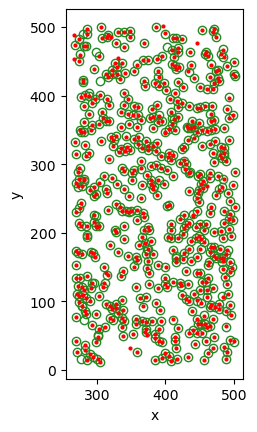

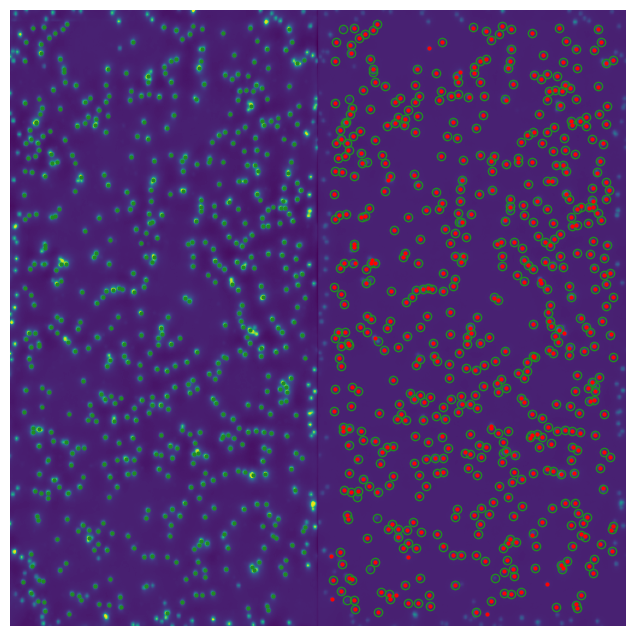

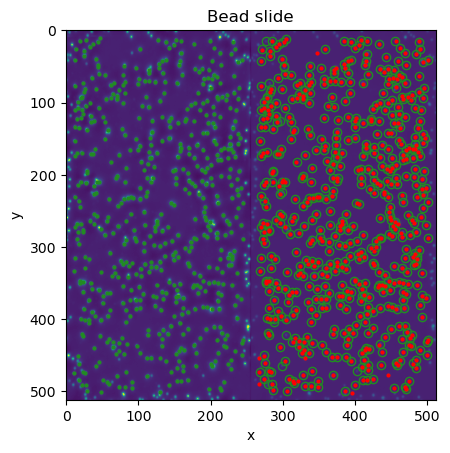

In [9]:
exp.files.print()

mapping_file_index = 0 #make sure this index points to the correct file
mapping_file = exp.files[mapping_file_index]

mapping_file.perform_mapping()

figure, axis = mapping_file.show_image()
mapping_file.mapping.show(axis=axis, show_source=True)
plt.show()

## Interpretation and optimization
* How to interpret the result: make sure that most of the spots in the images are detected. In addition, it is important that the detected spots and the matched points are homogeneously spread over the field of view. *[note jk: do we use above figures for interpretation? should'nt we also output a cross-section profile for the below minimum-intensity difference?*
* to tune settings: see 'advanced'

## Output:
The mapping is saved in a .mapping file and is automatically loaded when importing an experiment. Note that if multiple mapping files are present, the first mapping file in exp.files is used. So it is good practice to remove the .mapping files that should not be used.

 # Advanced

Set the appropriate setting under the mapping heading in the config.yml file.
    * Look for entries under 'mapping'
    * Especially the minimum_intensity_difference will need to be adjusted separately for the different emission channels. An initial guess for the value can be determined from the difference between background and molecule intensity in a plotted image [1] .

*[notes JK]* _____________________________________________________________-

[1] how should one do this? I think I found the default minimum_intensity_difference=25, but this one was not listed in the config file. shouldn't we add it there if this is important?]. Plus, would be good to output a crossection here that allows guesstimating

[2] There's a lot of peakfinding methods I see. How should we describe these for advanced use/let a user know they exist?